In [ ]:
### GENERAL INFORMATION #######################################################
#   Name:           Sherlon Almeida da Silva                                  #
#   USP number:     11361585                                                  #
#   course code:    SCC5830                                                   #
#   Year/Semestre:  2024/1                                                    #
#   Title:          Assignment 3 : Morphology + Color                         #
###############################################################################

#Obtendo as Imagens

In [ ]:
pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
import gdown

#Realizando download dos dados do Google Drive
!gdown --id '1j1hB6pOeDPXkolBR4P5VhyYXSauXWmr7' #id do link de compartilhamento (Imagens)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j1hB6pOeDPXkolBR4P5VhyYXSauXWmr7
To: /content/Dataset-AllClasses.zip
100% 2.11M/2.11M [00:00<00:00, 28.6MB/s]


In [ ]:
#Descompactando dataset para a raiz do notebook
!unzip /content/Dataset-AllClasses.zip

Archive:  /content/Dataset-AllClasses.zip
   creating: Dataset-AllClasses/
  inflating: Dataset-AllClasses/skin_lesion_1.jpg  
  inflating: Dataset-AllClasses/skin_lesion_2.jpg  
  inflating: Dataset-AllClasses/skin_lesion_3.jpg  
  inflating: Dataset-AllClasses/skin_lesion_4.jpg  
  inflating: Dataset-AllClasses/skin_lesion_5.jpg  
  inflating: Dataset-AllClasses/skin_lesion_6.jpg  
  inflating: Dataset-AllClasses/chest_xray_1.png  
  inflating: Dataset-AllClasses/chest_xray_2.png  
  inflating: Dataset-AllClasses/chest_xray_3.png  
  inflating: Dataset-AllClasses/chest_xray_4.png  
  inflating: Dataset-AllClasses/chest_xray_5.png  
  inflating: Dataset-AllClasses/chest_xray_6.png  


#Apresentando os Dados de Entrada

In [ ]:
import os
import imageio.v3 as imageio

#Obtendo os dados de entrada
dataset_folder = "Dataset-AllClasses/"
files = os.listdir(dataset_folder)
files.sort()
print(files)

['chest_xray_1.png', 'chest_xray_2.png', 'chest_xray_3.png', 'chest_xray_4.png', 'chest_xray_5.png', 'chest_xray_6.png', 'skin_lesion_1.jpg', 'skin_lesion_2.jpg', 'skin_lesion_3.jpg', 'skin_lesion_4.jpg', 'skin_lesion_5.jpg', 'skin_lesion_6.jpg']


In [ ]:
#Carregando as imagens em uma lista
images = []
for I_file in files:
  I  = imageio.imread(dataset_folder+I_file) #Carrega a Imagem de Entrada
  images.append(I)

In [ ]:
import matplotlib.pyplot as plt

def show_images(data, rows=2, columns=5, figsize=(10, 4)):
    fig, axes = plt.subplots(figsize=figsize, nrows=rows, ncols=columns, dpi=150)

    for i in range(rows):
      for j in range(columns):
        ax = axes[i, j]
        idx = i*columns+j
        ax.imshow(data[idx], cmap="gray")
        curr_label = f"Image {idx}"
        ax.title.set_text(curr_label)
        ax.axis('off')
    plt.show()

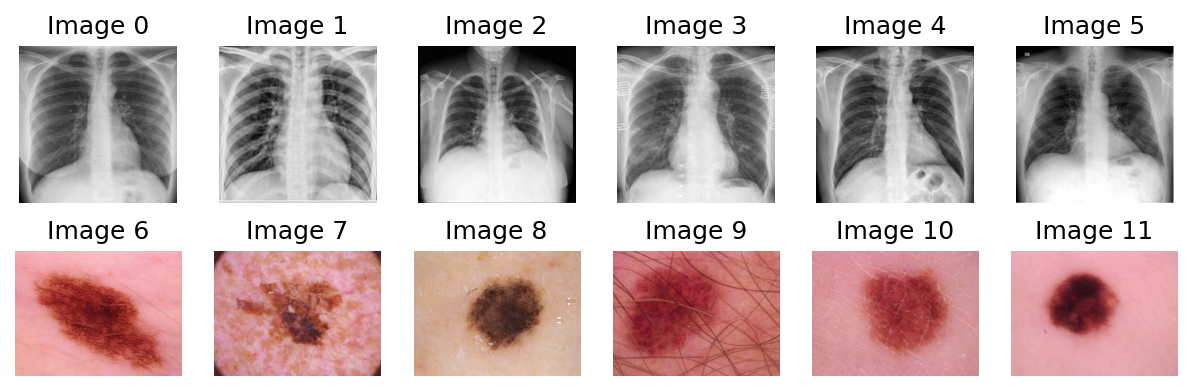

In [ ]:
#Apresentando as imagens de entrada
show_images(images, rows=2, columns=6, figsize=(10, 3))

#Conversão para Grayscale

In [ ]:
import numpy as np

#Transforma as imagem para escala de cinza
images_gray = []

for img in images:
  if len(img.shape) > 2: #Se for RGB converte para Gray, senão apenas mantém
    img = np.dot(img, [0.2989, 0.5870, 0.1140]).astype(np.int64)
  images_gray.append(img)

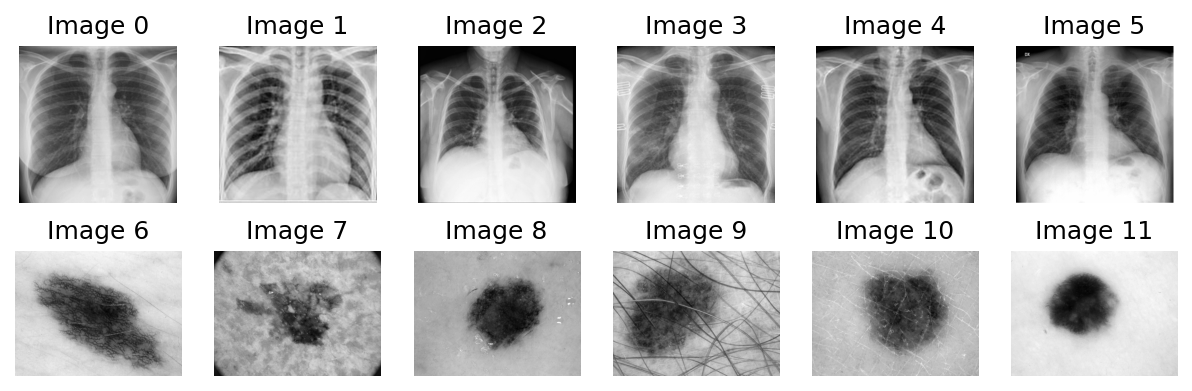

In [ ]:
#Apresentando as imagens de entrada (Em Grayscale)
show_images(images_gray, rows=2, columns=6, figsize=(10, 3))

#Limiarização Adaptativa (Otsu)

In [ ]:
def otsu(img: np.ndarray, c = 0) -> np.ndarray:

  """Implemente o seu próprio código para esta função"""


In [ ]:
#Transforma as imagem em binárias
images_bin = []

for img in images_gray:
  new_img = otsu(img.copy(), c = 0)
  images_bin.append(new_img)

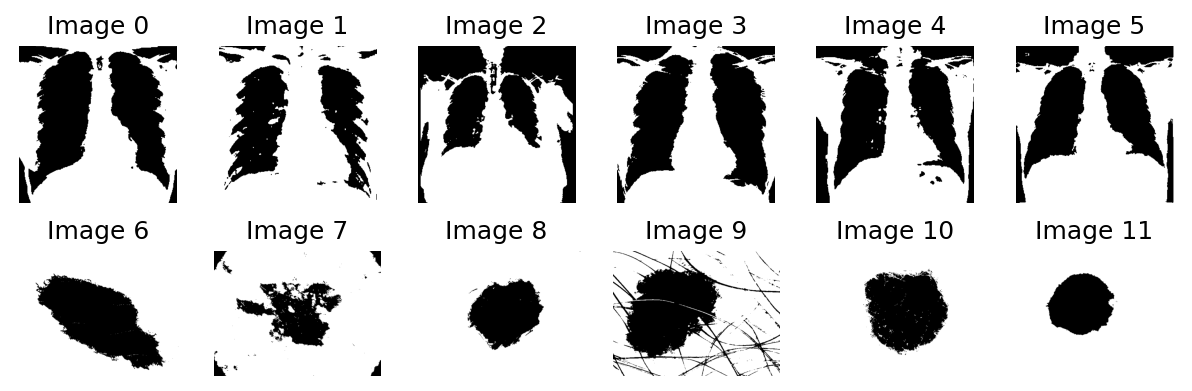

In [ ]:
#Apresentando as imagens de entrada (Em Grayscale)
show_images(images_bin, rows=2, columns=6, figsize=(10, 3))

#Aplicando Processamento Morfológico (Erosão e Dilatação)

In [ ]:
"""Retorna a imagem erodita"""
def erosion(img, M, N):
    """Implemente o seu próprio código para esta função"""
    #Considere o Kernel = 3

"""Retorna a imagem dilatada"""
def dilation(img, M, N):
    """Implemente o seu próprio código para esta função"""
    #Considere o Kernel = 3

In [ ]:
#Define o conjunto de operações a serem realizadas para cada imagem individualmente
#Onde 1=Erosão e 2=Dilatação
ciclo_morfologico = [[2,2,2,2,2,2,2,2,2,1,1,1], #Image 0
                     [1,1,1,2,2,2,2,1], #Image 1
                     [2,2,2,2,1], #Image 2
                     [2,2,1,1], #Image 3
                     [2,2,1,1,2,2,1], #Image 4
                     [2,2,2,2,2,2,1,1,1], #Image 5
                     [1,1,2,2,1], #Image 6
                     [1,1,1,1,1,1,1,2,2,2,2,2,2,2], #Image 7
                     [1,1,2,2,2], #Image 8
                     [2,2,2,2,1,1,1,1,1], #Image 9
                     [1,1,2,2], #Image 10
                     [1,1,2,2]] #Image 11

#Transforma as imagem com Operações Morfológicas
images_morf = []
for idx,img in enumerate(images_bin):
  M,N = img.shape
  for apply_morphology in ciclo_morfologico[idx]:
    if apply_morphology == 1:
      #Ciclo de Erosões (Expande a área de interesse PRETA e Reduz a BRANCA -> Voltar ao tamanho original sem ruído)
      img = erosion(img, M, N)
    elif apply_morphology == 2:
      #Ciclo de Dilatações (Expande a área de NÃO interesse BRANCA e Reduz a PRETA -> Redução de ruído)
      img = dilation(img, M, N)
  images_morf.append(img)

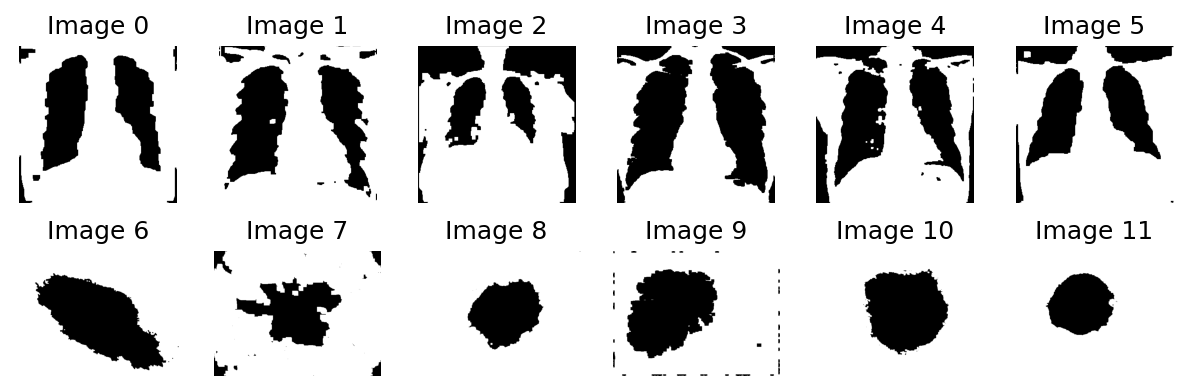

In [ ]:
#Apresentando as imagens de entrada (Em Grayscale)
show_images(images_morf, rows=2, columns=6, figsize=(10, 3))

# Aplicando Cor em Regiões de Interesse (Heatmap)
## **Você poderá utilizar as funções a seguir na sua implementação.**

In [ ]:
def filter_gaussian(P, Q):
    s1 = P
    s2 = Q

    D = np.zeros([P, Q])  # Compute Distances
    for u in range(P):
        for v in range(Q):
            x = (u-(P/2))**2/(2*s1**2) + (v-(Q/2))**2/(2*s2**2)
            D[u, v] = np.exp(-x)
    return D

In [ ]:
#Espectro Visível
heatmap_colors = [
    [1, 0, 1],   # Pink
    [0, 0, 1],   # Blue
    [0, 1, 0],   # Green
    [1, 1, 0],   # Yellow
    [1, 0, 0]    # Red
]

# Function to map values to colors
def map_value_to_color(value, min_val, max_val, colormap):
    # Scale the value to the range [0, len(colormap) - 1]
    scaled_value = (value - min_val) / (max_val - min_val) * (len(colormap) - 1)
    # Determine the two closest colors in the colormap
    idx1 = int(scaled_value)
    idx2 = min(idx1 + 1, len(colormap) - 1)
    # Interpolate between the two colors based on the fractional part
    frac = scaled_value - idx1
    color = [
        (1 - frac) * colormap[idx1][0] + frac * colormap[idx2][0],
        (1 - frac) * colormap[idx1][1] + frac * colormap[idx2][1],
        (1 - frac) * colormap[idx1][2] + frac * colormap[idx2][2]
    ]
    return color

In [ ]:
"""Calcula o erro"""
def rms_error(img, out):
    M,N = img.shape
    error = ((1/(M*N))*np.sum((img-out)**2))**(1/2)
    return error

In [ ]:
#Transforma as imagens FINAIS
images_out = []

# Define alpha value for blending
alpha = 0.30  # Adjust this value to control the transparency of the heatmap

for idx,img in enumerate(images_gray):
  #Obtendo a máscara binária
  mask = images_morf[idx]

  #Coloração Gradiente
  M, N = mask.shape[0], mask.shape[1]
  color_distribution = filter_gaussian(M, N)
  min_val = np.min(np.array(color_distribution))
  max_val = np.max(np.array(color_distribution))

  heatmap_image = np.zeros([M, N, 3]) #Imagem RGB vazia
  for i in range(M):
      for j in range(N):
          heatmap_image[i, j] = map_value_to_color(color_distribution[i, j], min_val, max_val, heatmap_colors)

  img_color = np.ones([M, N, 3]) #Imagem RGB vazia
  indexes = np.where(mask==0)
  img_color[indexes] = heatmap_image[indexes]

  #Imagem final
  gray_image = img
  gray_image_normalized = gray_image / np.max(gray_image)

  # Mix the grayscale image and heatmap using alpha compositing
  mixed_image = #Definir aqui a composição da nova imagem como 70% a imagem original de entrada + 30% a máscara colorida

  images_out.append(mixed_image)

  #Calcula o erro para cada canal de cor
  H  = imageio.imread(output_filename) #Carrega a Imagem de Referencia
  error_R = rms_error(mixed_image[:,:,0], H[:,:,0])
  error_G = rms_error(mixed_image[:,:,1], H[:,:,1])
  error_B = rms_error(mixed_image[:,:,2], H[:,:,2])
  error = (error_R + error_G + error_B)/3
  print(f"{error:.4f}")

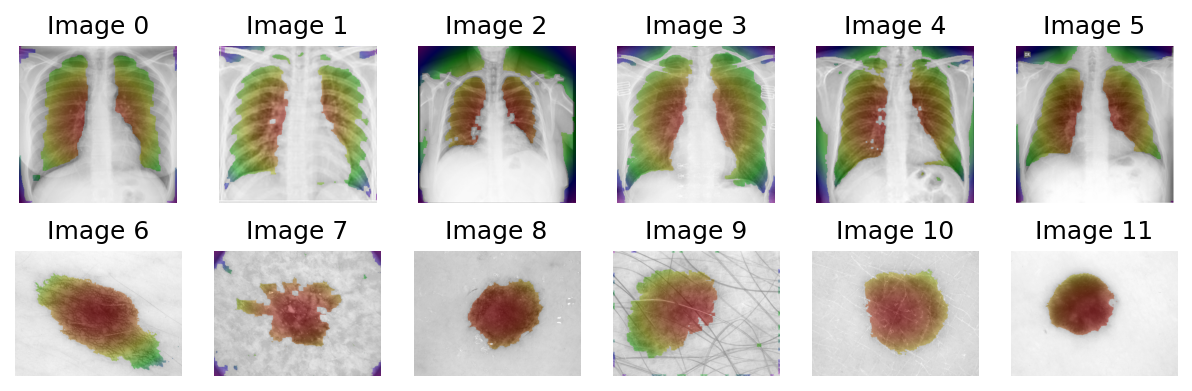

In [ ]:
#Apresentando as imagens de Saída (Finais)
show_images(images_out, rows=2, columns=6, figsize=(10, 3))